<a href="https://colab.research.google.com/github/davidrtorres/dsc-mod-4-project-v2-1-onl01-dtsc-pt-041320/blob/master/nlp_model_4_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1096]:
print('This is edited in Colab!!!')

This is edited in Colab!!!


In [1097]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import io

In [1098]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [1099]:
# from google.colab import files
# uploaded = files.upload()

In [1100]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Create & upload a text file.
# uploaded = drive.CreateFile({'title': 'Sample file.txt'})
# uploaded.SetContentString('Sample upload file content')
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [1101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1102]:
"""
 analyze Twitter sentiment about Apple and Google products. The dataset comes from CrowdFlower via data.world. 
     Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither.

Your task is to:

Build a model that can rate the sentiment of a Tweet based on its content.

Aim for a Proof of Concept
There are many approaches to NLP problems - start with something simple and iterate from there. 
For example, you could start by limiting your analysis to positive and negative Tweets only, allowing you to build a binary classifier. 
Then you could add in the neutral Tweets to build out a multiclass classifier. 
You may also consider using some of the more advanced NLP methods in the Mod 4 Appendix.

Evaluation
Evaluating multiclass classifiers can be trickier than binary classifiers because there are multiple ways to 
    mis-classify an observation, and some errors are more problematic than others. 
    Use the business problem that your NLP project sets out to solve to inform your choice of evaluation metrics.

"""

#df = pd.read_csv(io.BytesIO(uploaded['judge-1377884607_tweet_product_company.csv']), encoding='unicode_escape')
#df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')
df = pd.read_csv('/content/gdrive/My Drive/judge-1377884607_tweet_product_company.csv',encoding='unicode_escape') 

In [1103]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [1104]:
#df['tweet_text'].to_list()
df.shape

(9093, 3)

In [1105]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [1106]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'label'}, inplace=True)

In [1107]:
#df = df.drop('emotion_in_tweet_is_directed_at',axis=1, inplace=True)
df_data = df[['tweet_text','label']]

In [1108]:
df_data.head()

,tweet_text,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [1109]:
df_data.isna().sum()

tweet_text    1
label         0
dtype: int64

In [1110]:
df_data.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1111]:
df_data.isna().sum()

tweet_text    0
label         0
dtype: int64

In [1112]:
df_data['label'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: label, dtype: int64

In [1113]:
df_data_1 = df_data.copy()

In [1114]:
corpus = df_data_1['tweet_text'].to_list()

In [1115]:
corpus[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)"]

In [1116]:
"""
Make Bag of Words Frequency Distribution
collection fo evey word that appears in the text and ho many times it appears
"""
from nltk import FreqDist

In [1117]:
#make freqdist from corpus
freq = FreqDist(','.join(corpus))
freq.most_common(100)

[(' ', 153873),
 ('e', 72593),
 ('o', 62850),
 ('n', 56651),
 ('t', 55549),
 ('i', 51978),
 ('a', 46024),
 ('s', 43823),
 ('r', 31903),
 ('l', 30420),
 ('h', 21549),
 ('p', 21506),
 ('d', 20073),
 ('m', 19206),
 ('u', 18363),
 ('w', 15979),
 ('#', 15875),
 ('g', 15602),
 ('c', 14950),
 ('S', 13550),
 (',', 12649),
 ('y', 11753),
 ('k', 10404),
 ('f', 9839),
 ('.', 8382),
 ('b', 7514),
 ('@', 7194),
 ('W', 6831),
 ('x', 6460),
 ('T', 5977),
 ('P', 5701),
 ('A', 5597),
 ('v', 5258),
 ('X', 5211),
 ('}', 4298),
 ('{', 4296),
 ('R', 3865),
 ('G', 3585),
 ('I', 2982),
 ("'", 2903),
 (';', 2800),
 ('&', 2707),
 ('C', 2689),
 ('-', 2438),
 ('M', 2412),
 ('!', 2398),
 (':', 2310),
 ('2', 2213),
 ('q', 2098),
 ('N', 1898),
 ('?', 1659),
 ('B', 1476),
 ('L', 1446),
 ('D', 1332),
 ('H', 1295),
 ('1', 1248),
 ('F', 1161),
 ('O', 1110),
 ('j', 1054),
 ('0', 1040),
 ('/', 1019),
 ('E', 1013),
 (')', 801),
 ('(', 770),
 ('U', 740),
 ('z', 721),
 ('\x89', 691),
 ('3', 616),
 ('Û', 582),
 ('J', 563),
 

In [1118]:
"""
need to tokenize text to get words and not letters
tokenize corpus then generate FreqDist
"""
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1119]:
#convert corpus to tokens. Creates 1 giant string
#punctuation
#https
#
tokens = word_tokenize(','.join(corpus))
freq = FreqDist(tokens)
freq.most_common(100)

[('#', 15875),
 (',', 12553),
 ('@', 7194),
 ('mention', 7119),
 ('.', 4957),
 ('SXSW', 4735),
 ('sxsw', 4476),
 ('link', 4311),
 ('}', 4298),
 ('{', 4296),
 ('the', 3926),
 ('to', 3519),
 ('RT', 2945),
 ('at', 2859),
 (';', 2800),
 ('&', 2707),
 ('for', 2439),
 ('!', 2398),
 ('a', 2172),
 ('Google', 2134),
 ('iPad', 2115),
 (':', 2075),
 ('Apple', 1879),
 ('in', 1830),
 ('quot', 1696),
 ('of', 1691),
 ('?', 1659),
 ('is', 1647),
 ('and', 1525),
 ('I', 1457),
 ('iPhone', 1298),
 ('on', 1271),
 ("'s", 1232),
 ('2', 1114),
 ('store', 1046),
 ('-', 972),
 ('you', 944),
 ('Austin', 900),
 ('an', 853),
 ('amp', 836),
 ('with', 804),
 (')', 801),
 ('up', 778),
 ('(', 770),
 ('it', 764),
 ('my', 711),
 ('...', 643),
 ('app', 630),
 ('Circles', 582),
 ('new', 566),
 ('be', 544),
 ('New', 518),
 ('from', 505),
 ('this', 496),
 ('by', 485),
 ('The', 483),
 ("n't", 478),
 ('out', 478),
 ('that', 465),
 ('are', 456),
 ('google', 448),
 ('Android', 445),
 ('your', 431),
 ('not', 426),
 ('Store', 42

In [1120]:
tokens[:50]

['.',
 '@',
 'wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 '.',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#',
 'RISE_Austin',
 ',',
 'it',
 'was',
 'dead',
 '!',
 'I',
 'need',
 'to',
 'upgrade',
 '.',
 'Plugin',
 'stations',
 'at',
 '#',
 'SXSW.',
 ',',
 '@',
 'jessedee',
 'Know',
 'about',
 '@',
 'fludapp',
 '?',
 'Awesome',
 'iPad/iPhone',
 'app',
 'that',
 'you',
 "'ll",
 'likely',
 'appreciate',
 'for',
 'its',
 'design']

In [1121]:
#deal w/stop words
#make a list of stopwords to remove
nltk.download('stopwords')
from nltk.corpus import stopwords

import string  #pulls in punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1122]:
"""
these words will be eliminated from text
"""
stopwords_list = stopwords.words('english')
stopwords_list[:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [1123]:
#add punctuation to stopwords list
stopwords_list.extend(string.punctuation)

In [1124]:
#punctuation added to end of stopwords list
stopwords_list[-20:]

['-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [1125]:
#add additiona ltweet punctuation to stopwords list
additional_punc = ['--'"' '",'...'," '' ",'_']
stopwords_list.extend(additional_punc)

In [1126]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1127]:
#not always accepting what's in stop_words
#print('until' in stopwords_list)

In [1128]:
#remove until from stopwords_list
#don't have to accept all of the stopwords
stopwords_list.remove('until')
print('until' in stopwords_list)

False


In [1129]:
#remove stop words
#take tokens and remove stop words
stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
stopped_tokens[:50]

['wesley83',
 '3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw.',
 'jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad/iphone',
 'app',
 "'ll",
 'likely',
 'appreciate',
 'design',
 'also',
 "'re",
 'giving',
 'free',
 'ts',
 'sxsw',
 'swonderlin',
 'wait',
 'ipad',
 '2',
 'also',
 'sale',
 'sxsw.',
 'sxsw',
 'hope',
 'year',
 "'s",
 'festival',
 "n't",
 'crashy',
 'year',
 "'s",
 'iphone',
 'app',
 'sxsw',
 'sxtxstate',
 'great']

In [1130]:
#remake freqdist
#most common 100 words that were in corpus
freq = FreqDist(stopped_tokens)
freq.most_common(150)

[('sxsw', 9414),
 ('mention', 7120),
 ('link', 4313),
 ('rt', 2960),
 ('google', 2592),
 ('ipad', 2431),
 ('apple', 2300),
 ('quot', 1696),
 ('iphone', 1513),
 ('store', 1469),
 ("'s", 1236),
 ('2', 1114),
 ('new', 1087),
 ('austin', 959),
 ('amp', 836),
 ('app', 810),
 ('launch', 653),
 ('circles', 651),
 ('social', 647),
 ('android', 574),
 ('today', 574),
 ("n't", 481),
 ('network', 465),
 ('ipad2', 457),
 ('pop-up', 420),
 ('via', 413),
 ('line', 402),
 ('free', 387),
 ('get', 386),
 ('called', 361),
 ('party', 346),
 ('sxswi', 340),
 ('mobile', 338),
 ('one', 308),
 ('major', 301),
 ('like', 290),
 ('time', 271),
 ("'re", 265),
 ('temporary', 264),
 ('opening', 257),
 ("'m", 254),
 ('possibly', 240),
 ('people', 226),
 ('downtown', 225),
 ('apps', 224),
 ('great', 222),
 ('see', 219),
 ('maps', 219),
 ('going', 217),
 ('check', 215),
 ('mayer', 214),
 ('day', 214),
 ('open', 210),
 ('popup', 209),
 ('need', 205),
 ('go', 205),
 ('marissa', 189),
 ('got', 185),
 ('w/', 182),
 ('kno

In [1131]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

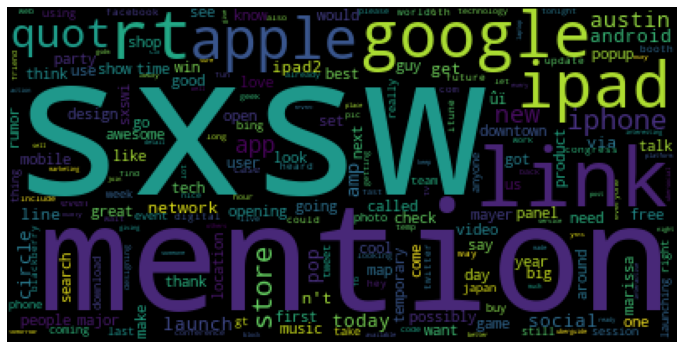

In [1132]:
wordcloud = WordCloud(stopwords=stopwords_list, collocations=False)
wordcloud.generate(','.join(stopped_tokens))

plt.figure(figsize=(12,12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

In [1133]:
"""
other corpus we can run
bigrams-looks for pairs of words that are going to occur commonly together

good eda
most common bigram: rt,mention
if we didn't have these bigram we wouldn't know taht rt goes w/mention
"""
import nltk

In [1134]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

In [1135]:
pd.DataFrame(tweets_scored, columns=['Words','Freq']).head(20)

,Words,Freq
0,"(rt, mention)",0.024711
1,"(sxsw, link)",0.008010
2,"(ipad, 2)",0.007993
3,"(link, sxsw)",0.007080
4,"(sxsw, rt)",0.005555
5,"(mention, mention)",0.005280
6,"(mention, sxsw)",0.005082
7,"(apple, store)",0.004970
8,"(link, rt)",0.004375
9,"(mention, google)",0.004152


In [1136]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)
tweets_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

In [1137]:
tweets_pmi_scored[:50]

[(('\x89û÷sxsw', 'go\x89ûª'), 14.50310520416662),
 (('knitted', 'staircase'), 14.240070798332827),
 (('jc', 'penney'), 14.240070798332823),
 (('naomi', 'campbell'), 14.240070798332823),
 (('parking', '5-10'), 14.240070798332823),
 (('pauly', 'celebs'), 14.240070798332823),
 (('98', 'accuracy'), 14.017678376996379),
 (('aron', 'pilhofer'), 14.017678376996379),
 (('charlie', 'sheen'), 14.017678376996379),
 (('follower', 'swarm'), 14.017678376996379),
 (('sheen', 'goddesses'), 14.017678376996379),
 (('swarm', 'ensues'), 14.017678376996379),
 (('alternate', 'routes'), 14.017678376996376),
 (('lynn', 'teo'), 14.017678376996376),
 (('policy', 'imacs'), 13.97703639249903),
 (('cameron', 'sinclair'), 13.825033299053981),
 (('elusive', "'power"), 13.825033299053981),
 (('staircase', 'attendance'), 13.825033299053981),
 (('zazzlsxsw', 'you\x89ûªll'), 13.825033299053981),
 (('likeability', 'virgin'), 13.754643971162583),
 (('14-day', 'return'), 13.655108297611669),
 (('barton', 'hollow'), 13.6551

In [1138]:
pd.DataFrame(tweets_pmi_scored, columns=['Word','Freq']).head(20)

,Word,Freq
0,"(û÷sxsw, goûª)",14.503105
1,"(knitted, staircase)",14.240071
2,"(jc, penney)",14.240071
3,"(naomi, campbell)",14.240071
4,"(parking, 5-10)",14.240071
5,"(pauly, celebs)",14.240071
6,"(98, accuracy)",14.017678
7,"(aron, pilhofer)",14.017678
8,"(charlie, sheen)",14.017678
9,"(follower, swarm)",14.017678


In [1139]:
"""
Regular Expressions-way to find complicated patterns in text
REGEX101

pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
allowing for there to be apostrophes in words
regexp_tokenize(text,pattern)
?-there's either 0 or 1 of specific letter
you may not have an s after http
"""


'\nRegular Expressions-way to find complicated patterns in text\nREGEX101\n\npattern = r"([a-zA-Z]+(?:\'[a-z]+)?)"\nallowing for there to be apostrophes in words\nregexp_tokenize(text,pattern)\n?-there\'s either 0 or 1 of specific letter\nyou may not have an s after http\n'

### Stemming Lematization

In [1140]:
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1141]:
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet'))
print(lemmatizer.lemmatize('running'))

foot
running


In [1142]:
#split data into a train set and test set
from sklearn.model_selection import train_test_split

In [1143]:
X = df_data_1['tweet_text']
y = df_data_1['label']

In [1144]:
X.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [1145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1146]:
##get raw text and vectorize it
#perform vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [1147]:
#create an instance of countvectorizer
count_vect = CountVectorizer()

In [1148]:
#fit vectorizer to data (build a vocab,count number of words)

#transform the orignal text message to vector
#fit vocabluary, count # of words, transform X_train so it's numercial vector
X_train_counts = count_vect.fit_transform(X_train)

In [1149]:
X_train_counts

<6091x8207 sparse matrix of type '<class 'numpy.int64'>'
	with 99578 stored elements in Compressed Sparse Row format>

In [1150]:
"""
there were 8207 unique words

"""
X_train.shape

(6091,)

In [1151]:
"""
messages, vocabulary count #
"""
X_train_counts.shape

(6091, 8207)

In [1152]:
"""
#transform the counts to frequencies with tf-idf
#then combine sets with tfidf vectorizer
#train classifier
#build a pipeline
Festure Extraction from Text (cont'd)
use tf-idf to give words that are more important more weight
"""

from sklearn.feature_extraction.text import TfidfTransformer

In [1153]:
tfidf_transformer = TfidfTransformer()

In [1154]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [1155]:
"""


"""
X_train_tfidf.shape

(6091, 8207)

In [1156]:
"""
combines coiuntvectoriation and tfidf

"""
from sklearn.feature_extraction.text import TfidfVectorizer

In [1157]:
vectorizer = TfidfVectorizer()

In [1158]:
X_train_tfidf_1 = vectorizer.fit_transform(X_train)

In [1159]:
X_train_tfidf_1.shape

(6091, 8207)

In [1160]:
#train a classifier
from sklearn.svm import LinearSVC

In [1161]:
clf = LinearSVC()

In [1162]:
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [1163]:
"""
only training set has been vecotrized into full vocaublary
pipeline can perform vectorization and classification
pipeline is like a regualar mcachine learning model
"""
from sklearn.pipeline import Pipeline

In [1164]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [1165]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [1166]:
predictions = text_clf.predict(X_test)

In [1167]:
predictions

array(['No emotion toward brand or product', 'Positive emotion',
       'No emotion toward brand or product', ...,
       'No emotion toward brand or product',
       'No emotion toward brand or product',
       'No emotion toward brand or product'], dtype=object)

In [1168]:
from sklearn.metrics import confusion_matrix, classification_report

In [1169]:
print(confusion_matrix(y_test, predictions))

[[   1    3   34   11]
 [   3   54   94   40]
 [   3   28 1433  296]
 [   2   21  439  539]]


In [1170]:
print(classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                      I can't tell       0.11      0.02      0.03        49
                  Negative emotion       0.51      0.28      0.36       191
No emotion toward brand or product       0.72      0.81      0.76      1760
                  Positive emotion       0.61      0.54      0.57      1001

                          accuracy                           0.68      3001
                         macro avg       0.49      0.41      0.43      3001
                      weighted avg       0.66      0.68      0.66      3001



In [1171]:
from sklearn import metrics

In [1172]:
metrics.accuracy_score(y_test, predictions)

0.6754415194935022

In [1173]:
"""
it is predicting that it's 'No emotion toward'
"""
text_clf.predict(['Hi, how are you doing today?'])

array(['No emotion toward brand or product'], dtype=object)

In [1174]:
text_clf.predict(['Congratulation, you have been selected as a winner!!'])

array(['Positive emotion'], dtype=object)

In [1175]:
df_data.head()

,tweet_text,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [1176]:
df_data['sentiment'] = df_data['label'].replace({
               'No emotion toward brand or product':0,
               'Positive emotion':1,
               'Negative emotion':2,
               "I can't tell":3})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1177]:
#df_data = df_data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [1178]:
df_data.head()

,tweet_text,label,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


In [1179]:
len(df_data)

9092

In [1180]:
df_data['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [1181]:
df_data.isnull().sum()

tweet_text    0
label         0
sentiment     0
dtype: int64

In [1182]:
"""

make sure there is a review there
df.drop(blanks, inplace=True)
"""
# blanks = []
# for i, lb, rv in df_data.itertuples():  #return index of index, label value, review text itself
#     if rv.isspace():
#         blanks.append(i) #collecting index postion of blank statements
# blanks        

count = 0
for a in df_data: 
    if (a.isspace()) == True: 
        count+=1
print(count) 


0


In [1183]:
df_data_1 = df_data.copy()

In [1184]:
#df['trump_tweet'] = (df['source']=='Twitter for Android').astype(int)
#df_data_1['sentiment'] = (df_data_1['is_there_an_emotion_directed_at_a_brand_or_product']== 'No emotion toward brand or product').astype(int)
#df['n'] = df['n'].replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})

df_data_1['sentiment'] = df_data_1['label'].replace({
               'No emotion toward brand or product':0,
               'Positive emotion':1,
               'Negative emotion':2,
               "I can't tell":3})


In [1185]:
"""
0    No emotion toward brand or product
1    Positive emotion
2    Negative emotion
3    I can't tell

"""
df_data_1['sentiment'].value_counts()

0    5388
1    2978
2     570
3     156
Name: sentiment, dtype: int64

In [1186]:
df_data_1.isna().sum()

tweet_text    0
label         0
sentiment     0
dtype: int64

In [1187]:
import re

In [1188]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for i in r:
        input_txt = re.sub(i,'', input_text)
        return input_txt

In [1189]:
df_data_1['tiddy_tweet'] = np.vectorize(remove_pattern)(df_data_1['tweet_text'],'@[\w]*')

In [1190]:
df_data_1.head(10)

,tweet_text,label,sentiment,tiddy_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1,Know about @fludapp ? Awesome iPad/iPhone app...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1,Can not wait for #iPad 2 also. They should sa...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2,I hope this year's festival isn't as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1,great stuff on Fri #SXSW: Marissa Mayer (Goog...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product,0,New iPad Apps For #SpeechTherapy And Communic...
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion,1,None
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion,1,Beautifully smart and simple idea RT @thenext...
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion,1,None
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion,1,Excited to meet the at #sxsw so I can show th...


### Removing Punctuations, Numbers, and special Characters

In [1191]:
#replace w/space
df_data_1['tiddy_tweet'] = df_data_1['tiddy_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [1192]:
df_data_1.head()

,tweet_text,label,sentiment,tiddy_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2,I have a G iPhone After hrs tweeting at #RISE...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1,Know about fludapp Awesome iPad iPhone app th...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1,Can not wait for #iPad also They should sale ...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2,I hope this year s festival isn t as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1,great stuff on Fri #SXSW Marissa Mayer Google...


In [1193]:
df_data_1

,tweet_text,label,sentiment,tiddy_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2,I have a G iPhone After hrs tweeting at #RISE...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1,Know about fludapp Awesome iPad iPhone app th...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1,Can not wait for #iPad also They should sale ...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2,I hope this year s festival isn t as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1,great stuff on Fri #SXSW Marissa Mayer Google...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,1,None
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,0,Wave buzz RT We interrupt your regularly sched...
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,0,None
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,0,None


In [1194]:
df_1 = df_data.copy()

In [1195]:
df_1.shape

(9092, 3)

In [1196]:
df_1.head()

,tweet_text,label,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


### Remove Short Words

In [1197]:
#df_data_1['tiddy_tweet'] = df_data_1['tiddy_tweet'].apply(lambda x: [for w in ])

In [1198]:
df_data['tweet_text'].isnull().values.any()

False

In [1199]:
df_data['tweet_text'].isna().sum()

0

In [1200]:
df_data[df_data['tweet_text']== np.NaN]

,tweet_text,label,sentiment


In [1201]:
df

,tweet_text,emotion_in_tweet_is_directed_at,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [1202]:
## Create a variable "corpus" containing all text

corpus = df_data['tweet_text'].to_list()
corpus[:10]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd',
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaV

In [1203]:
#Make a Bag-of-Words Frequency Distribution
from nltk import FreqDist

In [1204]:
#values = ','.join(str(v) for v in corpus)
freq = FreqDist(','.join(corpus))
## Display 100 most common words
freq.most_common(100)


[(' ', 153873),
 ('e', 72593),
 ('o', 62850),
 ('n', 56651),
 ('t', 55549),
 ('i', 51978),
 ('a', 46024),
 ('s', 43823),
 ('r', 31903),
 ('l', 30420),
 ('h', 21549),
 ('p', 21506),
 ('d', 20073),
 ('m', 19206),
 ('u', 18363),
 ('w', 15979),
 ('#', 15875),
 ('g', 15602),
 ('c', 14950),
 ('S', 13550),
 (',', 12649),
 ('y', 11753),
 ('k', 10404),
 ('f', 9839),
 ('.', 8382),
 ('b', 7514),
 ('@', 7194),
 ('W', 6831),
 ('x', 6460),
 ('T', 5977),
 ('P', 5701),
 ('A', 5597),
 ('v', 5258),
 ('X', 5211),
 ('}', 4298),
 ('{', 4296),
 ('R', 3865),
 ('G', 3585),
 ('I', 2982),
 ("'", 2903),
 (';', 2800),
 ('&', 2707),
 ('C', 2689),
 ('-', 2438),
 ('M', 2412),
 ('!', 2398),
 (':', 2310),
 ('2', 2213),
 ('q', 2098),
 ('N', 1898),
 ('?', 1659),
 ('B', 1476),
 ('L', 1446),
 ('D', 1332),
 ('H', 1295),
 ('1', 1248),
 ('F', 1161),
 ('O', 1110),
 ('j', 1054),
 ('0', 1040),
 ('/', 1019),
 ('E', 1013),
 (')', 801),
 ('(', 770),
 ('U', 740),
 ('z', 721),
 ('\x89', 691),
 ('3', 616),
 ('Û', 582),
 ('J', 563),
 

In [1205]:
#fdist1[100]
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1206]:
from nltk import word_tokenize
tokens = word_tokenize(','.join(corpus))
tokens[:100]

['.',
 '@',
 'wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 '.',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#',
 'RISE_Austin',
 ',',
 'it',
 'was',
 'dead',
 '!',
 'I',
 'need',
 'to',
 'upgrade',
 '.',
 'Plugin',
 'stations',
 'at',
 '#',
 'SXSW.',
 ',',
 '@',
 'jessedee',
 'Know',
 'about',
 '@',
 'fludapp',
 '?',
 'Awesome',
 'iPad/iPhone',
 'app',
 'that',
 'you',
 "'ll",
 'likely',
 'appreciate',
 'for',
 'its',
 'design',
 '.',
 'Also',
 ',',
 'they',
 "'re",
 'giving',
 'free',
 'Ts',
 'at',
 '#',
 'SXSW',
 ',',
 '@',
 'swonderlin',
 'Can',
 'not',
 'wait',
 'for',
 '#',
 'iPad',
 '2',
 'also',
 '.',
 'They',
 'should',
 'sale',
 'them',
 'down',
 'at',
 '#',
 'SXSW.',
 ',',
 '@',
 'sxsw',
 'I',
 'hope',
 'this',
 'year',
 "'s",
 'festival',
 'is',
 "n't",
 'as',
 'crashy',
 'as',
 'this',
 'year',
 "'s",
 'iPhone',
 'app']

In [1207]:
freq = FreqDist(tokens)
freq.most_common(100)

[('#', 15875),
 (',', 12553),
 ('@', 7194),
 ('mention', 7119),
 ('.', 4957),
 ('SXSW', 4735),
 ('sxsw', 4476),
 ('link', 4311),
 ('}', 4298),
 ('{', 4296),
 ('the', 3926),
 ('to', 3519),
 ('RT', 2945),
 ('at', 2859),
 (';', 2800),
 ('&', 2707),
 ('for', 2439),
 ('!', 2398),
 ('a', 2172),
 ('Google', 2134),
 ('iPad', 2115),
 (':', 2075),
 ('Apple', 1879),
 ('in', 1830),
 ('quot', 1696),
 ('of', 1691),
 ('?', 1659),
 ('is', 1647),
 ('and', 1525),
 ('I', 1457),
 ('iPhone', 1298),
 ('on', 1271),
 ("'s", 1232),
 ('2', 1114),
 ('store', 1046),
 ('-', 972),
 ('you', 944),
 ('Austin', 900),
 ('an', 853),
 ('amp', 836),
 ('with', 804),
 (')', 801),
 ('up', 778),
 ('(', 770),
 ('it', 764),
 ('my', 711),
 ('...', 643),
 ('app', 630),
 ('Circles', 582),
 ('new', 566),
 ('be', 544),
 ('New', 518),
 ('from', 505),
 ('this', 496),
 ('by', 485),
 ('The', 483),
 ("n't", 478),
 ('out', 478),
 ('that', 465),
 ('are', 456),
 ('google', 448),
 ('Android', 445),
 ('your', 431),
 ('not', 426),
 ('Store', 42

In [1208]:
from nltk.corpus import stopwords
import string

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1209]:
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1210]:
df_1 = df.copy()

In [1211]:
df_1.head()

,tweet_text,emotion_in_tweet_is_directed_at,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [1212]:
df_1.isna().sum()

tweet_text                            1
emotion_in_tweet_is_directed_at    5802
label                                 0
dtype: int64

In [1213]:
df_1.dropna(inplace=True)

In [1214]:
"""
create function to clean text
removal of words and symbols
substitue out whatever pattern we find for empty string
+ is for 1 or more
r tells python that pattern is a raw string
once we find pattern substitue for empty string
?-may ormay not have s
"""
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)  #removes @ mentions
    text = re.sub(r'#', '',text) #get rid of hashtags or number signs
    text = re.sub(r'RT[\s]+', '',text) #get rid of RT from text, RTs followed by 1 or more white spaces
    text = re.sub(r'https?:\/\/\S+', '',text) #get rid of hyperlink, check if followed by 1 or more white spaces
    
    return text

In [1215]:
#cleaning the text
df_1['tweet_text'] = df_1['tweet_text'].apply(cleantxt)

In [1216]:
#show text
df_1.head(16)

,tweet_text,emotion_in_tweet_is_directed_at,label
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,iPhone,Negative emotion
1,Know about ? Awesome iPad/iPhone app that yo...,iPad or iPhone App,Positive emotion
2,Can not wait for iPad 2 also. They should sal...,iPad,Positive emotion
3,I hope this year's festival isn't as crashy a...,iPad or iPhone App,Negative emotion
4,great stuff on Fri SXSW: Marissa Mayer (Googl...,Google,Positive emotion
7,"SXSW is just starting, CTIA is around the corn...",Android,Positive emotion
8,Beautifully smart and simple idea wrote about ...,iPad or iPhone App,Positive emotion
9,Counting down the days to sxsw plus strong Can...,Apple,Positive emotion
10,Excited to meet the at sxsw so I can show the...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at SXSW Wit...,Android App,Positive emotion


In [1217]:
df['tweet_text'].head(40)

0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1     @jessedee Know about @fludapp ? Awesome iPad/i...
2     @swonderlin Can not wait for #iPad 2 also. The...
3     @sxsw I hope this year's festival isn't as cra...
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...
5     @teachntech00 New iPad Apps For #SpeechTherapy...
6                                                   NaN
7     #SXSW is just starting, #CTIA is around the co...
8     Beautifully smart and simple idea RT @madebyma...
9     Counting down the days to #sxsw plus strong Ca...
10    Excited to meet the @samsungmobileus at #sxsw ...
11    Find &amp; Start Impromptu Parties at #SXSW Wi...
12    Foursquare ups the game, just in time for #SXS...
13    Gotta love this #SXSW Google Calendar featurin...
14    Great #sxsw ipad app from @madebymany: http://...
15    haha, awesomely rad iPad app by @madebymany ht...
16    Holler Gram for iPad on the iTunes App Store -...
17    I just noticed DST is coming this weekend.

In [1218]:
import re
sentence = "The development of snowboarding was 123 inspired by skateboarding, sledding, surfing and skiing."
pattern = r"[^\w]"
print(re.sub(pattern, " ", sentence))

The development of snowboarding was 123 inspired by skateboarding  sledding  surfing and skiing 


In [1219]:
pattern = r"[^\D]"
print(re.sub(pattern, " ", sentence))

The development of snowboarding was     inspired by skateboarding, sledding, surfing and skiing.


In [1220]:
### Computer Science

### Computer Science

In [1221]:
df_nlp = df_data.copy()

In [1222]:
df_nlp.head()

,tweet_text,label,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,2
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,1


In [1223]:
df_nlp.shape

(9092, 3)

In [1224]:
df_nlp.drop_duplicates(inplace=True)

In [1225]:
df_nlp.shape

(9070, 3)

In [1226]:
df_nlp.isna().sum()

tweet_text    0
label         0
sentiment     0
dtype: int64

In [1227]:
#stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1228]:
def process_text(text):
  #remove punctuation
  #text w/o any punctuation is now in no punc
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  #remove stopwords
  #clean words
  #separating each word by comma
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #return a list of clean text words
  return clean_words


In [1229]:
"""
show tokenization. That's what e did w/nopunc.splt()
separate words by commas
show a list of lemmas
"""
df_nlp['tweet_text'].head().apply(process_text)

0    [wesley83, 3G, iPhone, 3, hrs, tweeting, RISEA...
1    [jessedee, Know, fludapp, Awesome, iPadiPhone,...
2        [swonderlin, wait, iPad, 2, also, sale, SXSW]
3    [sxsw, hope, years, festival, isnt, crashy, ye...
4    [sxtxstate, great, stuff, Fri, SXSW, Marissa, ...
Name: tweet_text, dtype: object

In [1230]:
#show tokenization. Separated by commas
#show a ist of tokens (lemmas)

df_nlp['tweet_text'].head(10)

0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1     @jessedee Know about @fludapp ? Awesome iPad/i...
2     @swonderlin Can not wait for #iPad 2 also. The...
3     @sxsw I hope this year's festival isn't as cra...
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...
5     @teachntech00 New iPad Apps For #SpeechTherapy...
7     #SXSW is just starting, #CTIA is around the co...
8     Beautifully smart and simple idea RT @madebyma...
9     Counting down the days to #sxsw plus strong Ca...
10    Excited to meet the @samsungmobileus at #sxsw ...
Name: tweet_text, dtype: object

In [1231]:
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)  #removes @ mentions
    text = re.sub(r'#', '',text) #get rid of hashtags or number signs
    text = re.sub(r'RT[\s]+', '',text) #get rid of RT from text, RTs followed by 1 or more white spaces
    text = re.sub(r'https?:\/\/\S+', '',text) #get rid of hyperlink, check if followed by 1 or more white spaces
    
    return text

In [1232]:
#cleaning the text
df_nlp['tweet_text'] = df_nlp['tweet_text'].apply(cleantxt)

In [1233]:
df_nlp['tweet_text']

0       . I have a 3G iPhone. After 3 hrs tweeting at ...
1        Know about  ? Awesome iPad/iPhone app that yo...
2        Can not wait for iPad 2 also. They should sal...
3        I hope this year's festival isn't as crashy a...
4        great stuff on Fri SXSW: Marissa Mayer (Googl...
                              ...                        
9088                         Ipad everywhere. SXSW {link}
9089    Wave, buzz... We interrupt your regularly sche...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâGoog...
Name: tweet_text, Length: 9070, dtype: object

In [1234]:
#example
message4 = "hello world hellow world hello hello play"
message5 = 'test test test one hello'
print(message4)

#convert text to a matrix of tokens. token count
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message4], [message5]])
print(bow4)

hello world hellow world hello hello play
  (0, 0)	3
  (0, 5)	2
  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 4)	3
  (1, 2)	1


In [1235]:
#convert collection of text to a matrix of tokens
message_bow = CountVectorizer(analyzer=process_text).fit_transform(df_nlp['tweet_text'])

In [1236]:
#split data
X_1 = message_bow
y = df_nlp['sentiment']

In [1237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42)

In [1238]:
print(message_bow.shape)


(9070, 13254)


In [1239]:

#create and train NB Classifier
from sklearn.naive_bayes import MultinomialNB

In [1240]:
classifier = MultinomialNB().fit(X_train,y_train)

In [1241]:
#predictions
predictions = classifier.predict(X_train)
print(predictions)

[0 0 1 ... 0 0 0]


In [1242]:
print(classifier.predict(X_train))
print(y_train.values)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [1243]:
#evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1244]:
#model is 83% correct in predciting emotion of tweet
pred = classifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_train, pred))
print()
print("Accuracy:", accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3531
           1       0.81      0.80      0.81      2074
           2       0.91      0.37      0.52       369
           3       1.00      0.06      0.11       102

    accuracy                           0.83      6076
   macro avg       0.89      0.54      0.58      6076
weighted avg       0.84      0.83      0.82      6076


Confusion Matrix: 
 [[3271  250   10    0]
 [ 412 1660    2    0]
 [ 135   98  136    0]
 [  64   30    2    6]]

Accuracy: 0.8349242922975642


In [1245]:
#how is model doing on test data
print(classifier.predict(X_test))
print(y_test.values)


[0 2 0 ... 0 0 0]
[2 2 0 ... 0 0 2]


In [1246]:
#model is 65% correct in predciting emotion of tweet
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print()
print("Accuracy:", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1844
           1       0.50      0.59      0.54       896
           2       0.50      0.15      0.24       200
           3       0.00      0.00      0.00        54

    accuracy                           0.65      2994
   macro avg       0.44      0.37      0.38      2994
weighted avg       0.64      0.65      0.64      2994


Confusion Matrix: 
 [[1392  428   23    1]
 [ 362  528    6    0]
 [  83   84   31    2]
 [  36   16    2    0]]

Accuracy: 0.6516366065464262
